In [52]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import tree
import matplotlib.pyplot as plt
import graphviz

In [53]:
# We call the csv data
df = pd.read_csv('../data/raw/winequalityN.csv')
# We fill the NaN numerical values with 0
df.fillna(df.select_dtypes(include='number').mean(), inplace=True)

# White wine
dfW = df[df['type'] == 'white']
dfW = dfW.drop('type', axis=1)


0.5091836734693878


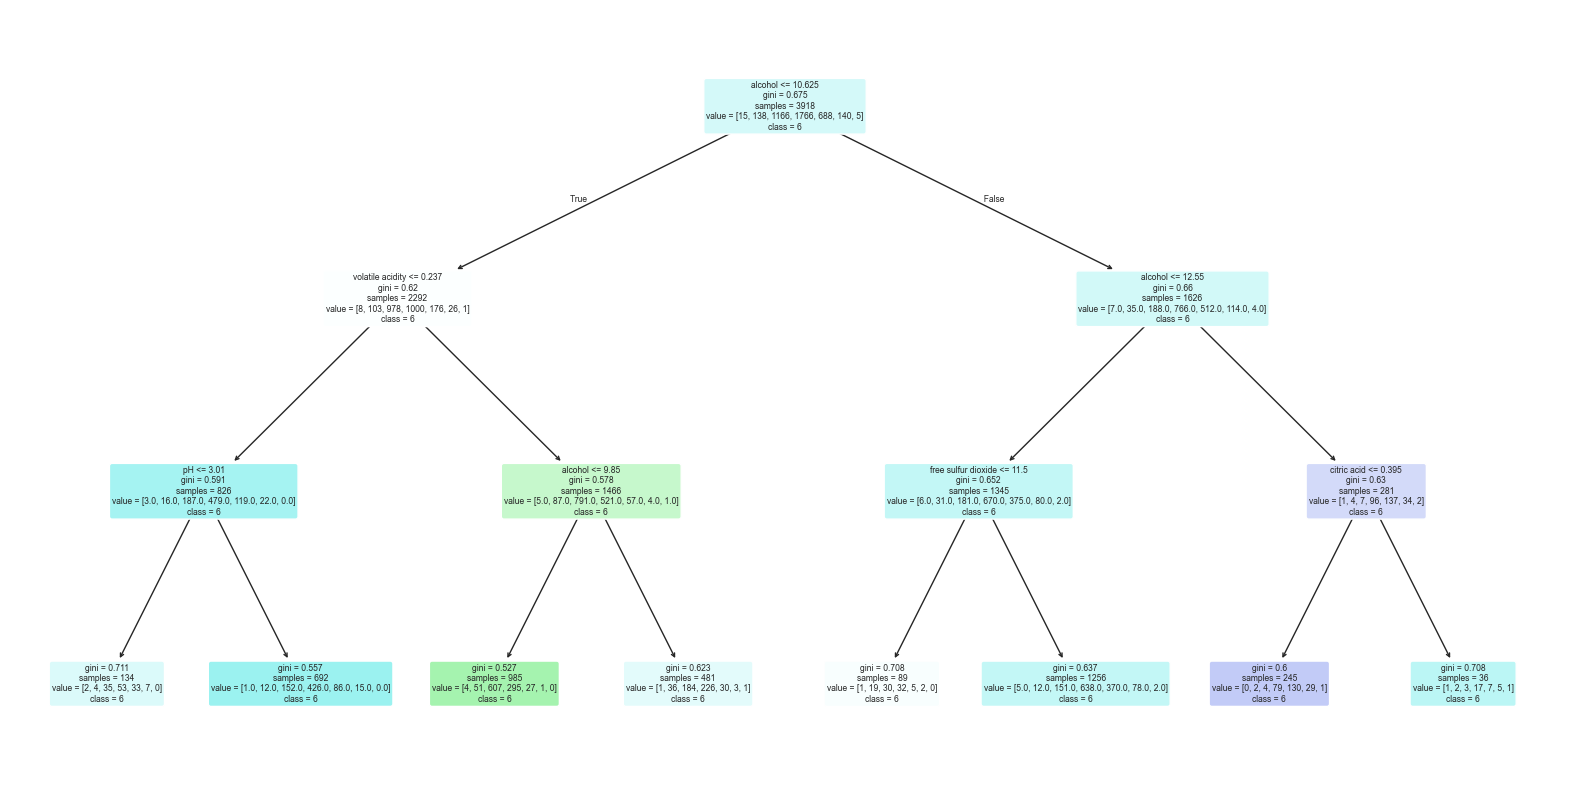

In [54]:
from sklearn.tree import plot_tree

# Y is our target
y = dfW['quality']
X = dfW.drop('quality', axis=1)


# We split the data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# We call our Class method (Decision Tree) and fit it
clf = DecisionTreeClassifier(max_depth=3, random_state=42)
#clf = DecisionTreeClassifier(min_samples_split=10, min_samples_leaf=5, random_state=42)
#clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

# Prediction
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)


plt.figure(figsize=(20,10))
plot_tree(clf, filled=True, feature_names=X.columns, class_names=[str(cls) for cls in y], rounded=True)
plt.show()
